## Time Series Basis In Code

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%config InlineBackend.figure_format = 'retina'

In [2]:
close = pd.read_csv("data_files/time_series_analysis/sp500_close.csv", 
                    index_col = 0, parse_dates = True)

In [3]:
goog = close[['GOOG']].copy().dropna()

def plot_series(series, stock_name = ''):
    fig, ax = plt.subplots(figsize = (12,4))
    series.plot(ax = ax)
    plt.grid(linestyle='--')
    plt.title(f"{stock_name} Stock Price", fontsize = 14)
    plt.ylabel("Price")
    plt.show()

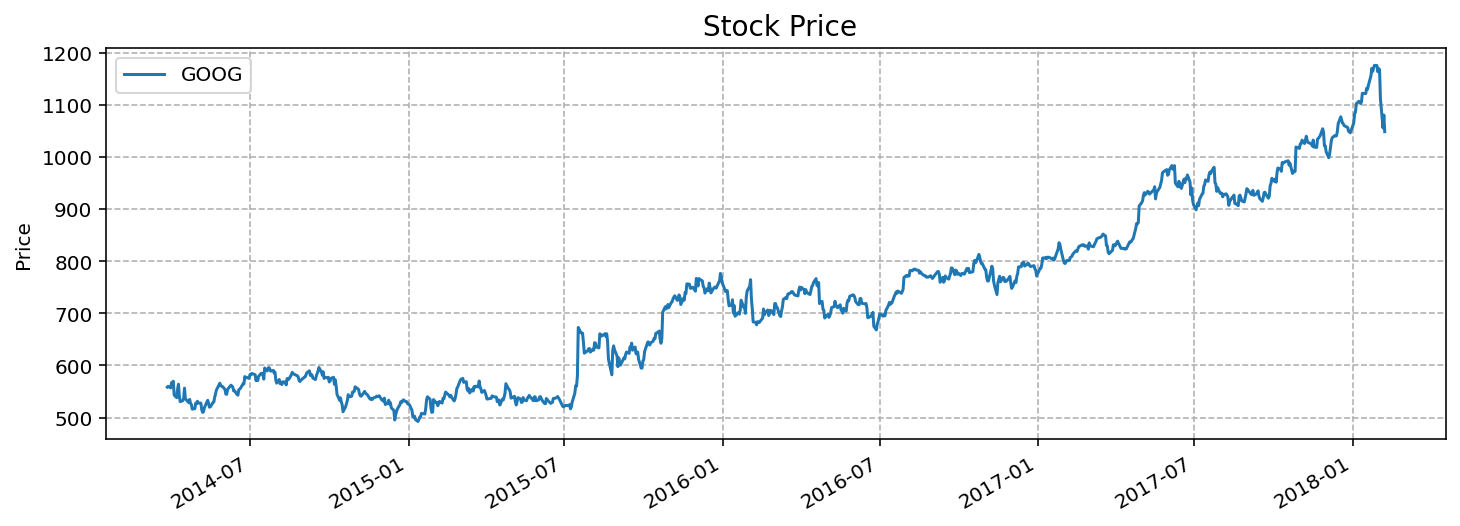

In [4]:
plot_series(goog)

### 1. Simple Moving Average-SMA

In [5]:
goog_ret = np.log(goog.pct_change(1) + 1)
ma_ret = goog_ret.rolling(10).mean()

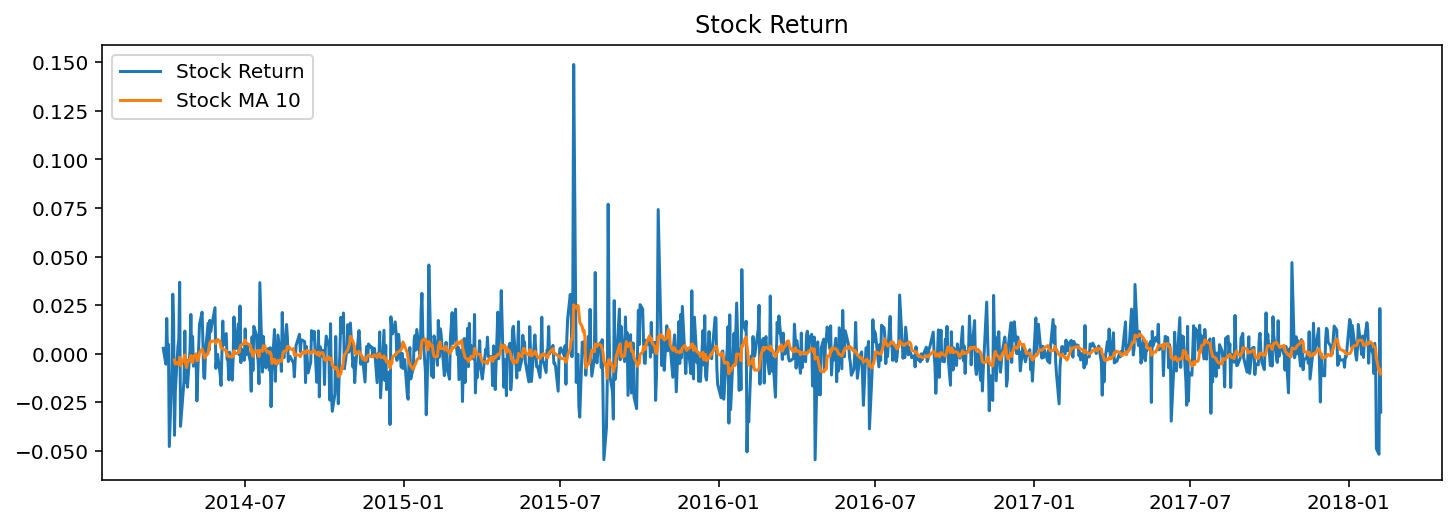

In [6]:
fig, ax = plt.subplots(figsize = (12,4))
plt.plot(goog_ret, label = 'Stock Return')
plt.plot(ma_ret, label = "Stock MA 10")
plt.title("Stock Return")
plt.legend(loc = 'upper left')
plt.show()

### 2. Exponential Weighted Moving Average-EWMA

In [7]:
airline = pd.read_csv('data_files/time_series_analysis/airline_passengers.csv', 
            index_col='Month', 
            parse_dates = True
           )

In [8]:
alpha = 0.2

ewm_airline = airline['Passengers'].ewm(alpha = alpha, adjust = False).mean()

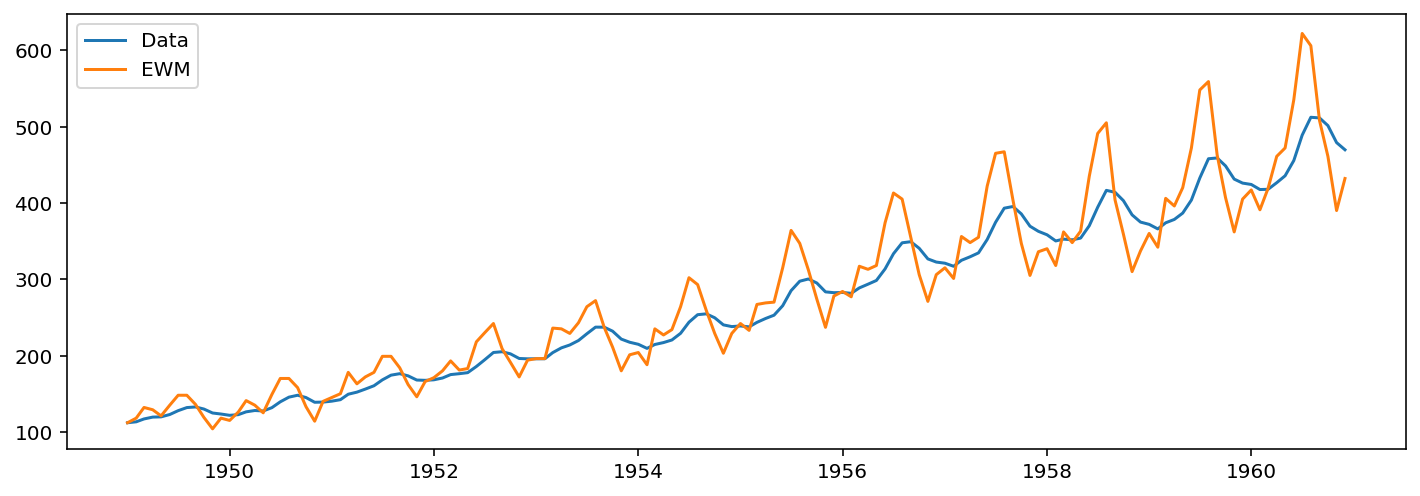

In [9]:
fig, ax = plt.subplots(figsize = (12,4))
plt.plot(ewm_airline, label = 'Data')
plt.plot(airline, label = 'EWM')
plt.legend(loc = 'upper left')
plt.show()

### 3. Simple Exponential Smoothing Forecast

In [10]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/compat/pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [11]:
airline.index.freq = 'MS'

In [12]:
ses = SimpleExpSmoothing(airline['Passengers'])
res = ses.fit(smoothing_level=alpha, optimized = False)
forecast = res.forecast(24)
fitted = res.fittedvalues

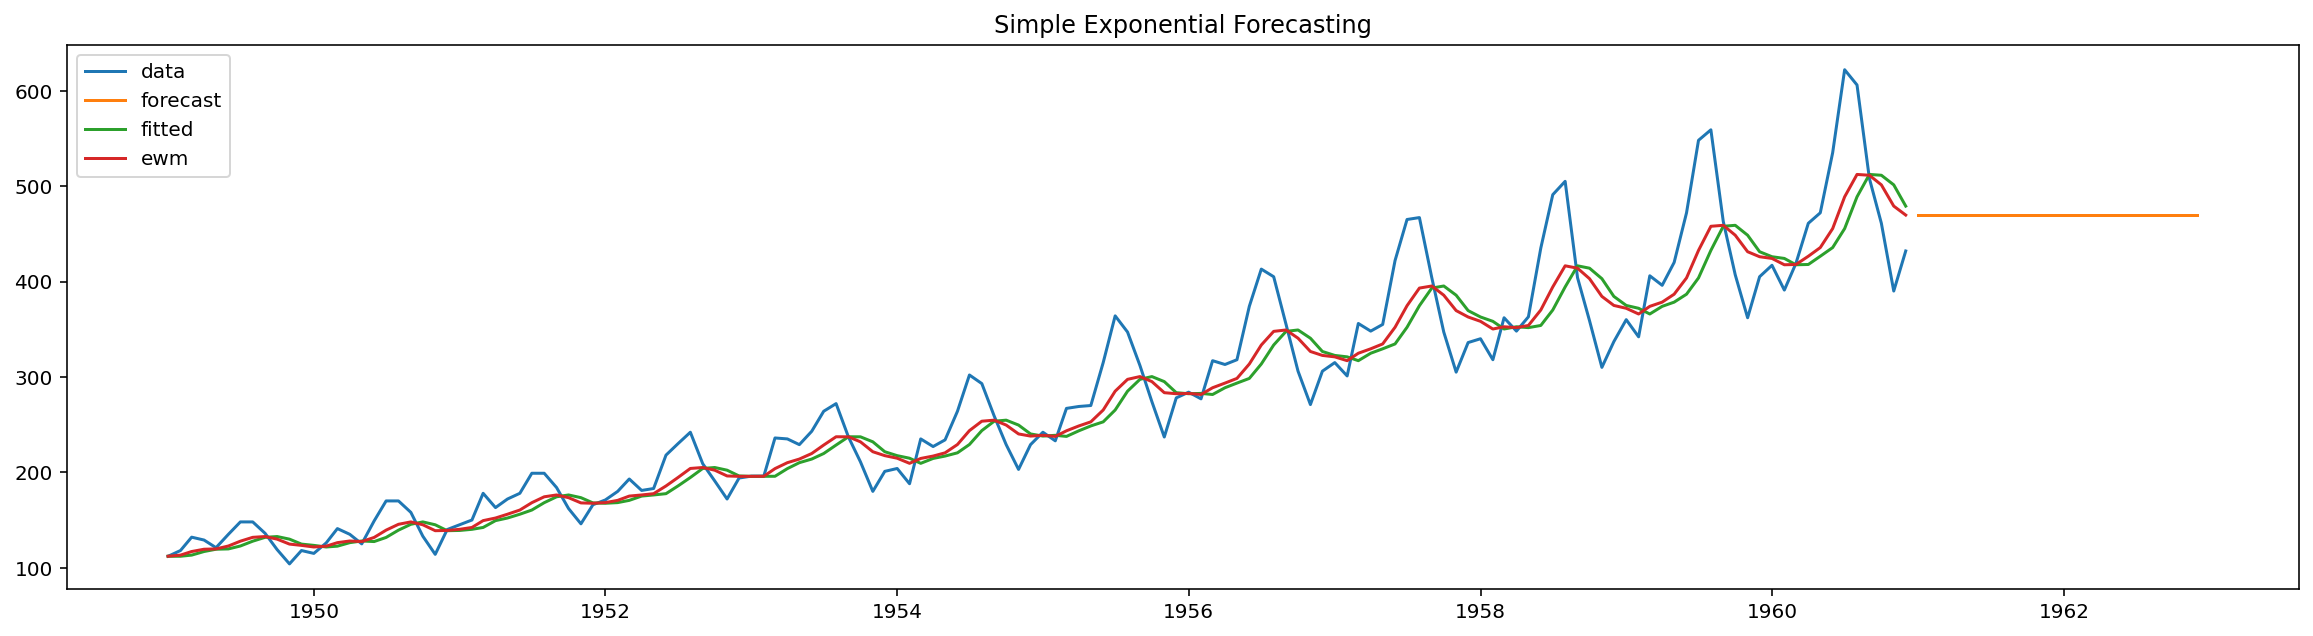

In [14]:
ewmpandas = airline['Passengers'].ewm(alpha = alpha, adjust = False).mean()
fig, ax = plt.subplots(figsize = (20,5))
plt.plot(airline, label = 'data')
plt.plot(forecast, label = 'forecast')
plt.plot(fitted, label = 'fitted')
plt.plot(ewmpandas, label = 'ewm')
plt.title("Simple Exponential Forecasting")
plt.legend(loc = 'upper left')
plt.show()

### 4. Holt's Linear Trend Model

In [15]:
from statsmodels.tsa.holtwinters import Holt

In [16]:
holt = Holt(airline['Passengers'])
res = holt.fit()
fitted = res.fittedvalues
forecast = res.forecast(24)

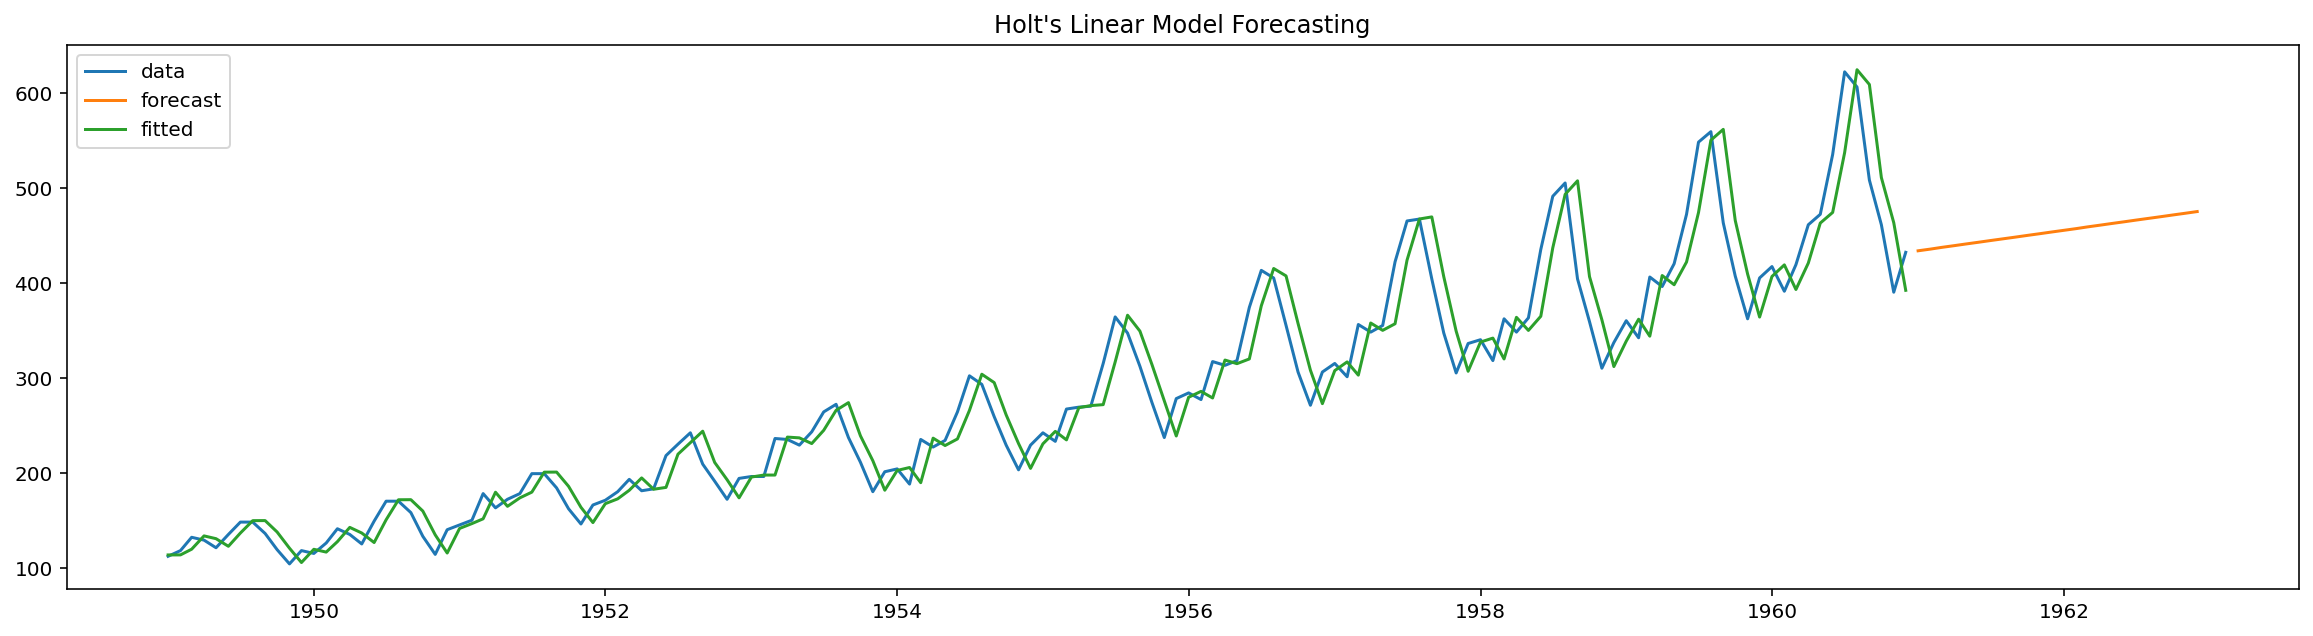

In [17]:
fig, ax = plt.subplots(figsize = (20,5))
plt.plot(airline, label = 'data')
plt.plot(forecast, label = 'forecast')
plt.plot(fitted, label = 'fitted')
plt.title("Holt's Linear Model Forecasting")
plt.legend(loc = 'upper left')
plt.show()

### 5. Holt Winters

In [18]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [19]:
hw = ExponentialSmoothing(airline['Passengers'], trend = 'add', seasonal = 'mul', seasonal_periods=12)
res = hw.fit()
fitted = res.fittedvalues
forecast = res.forecast(24)

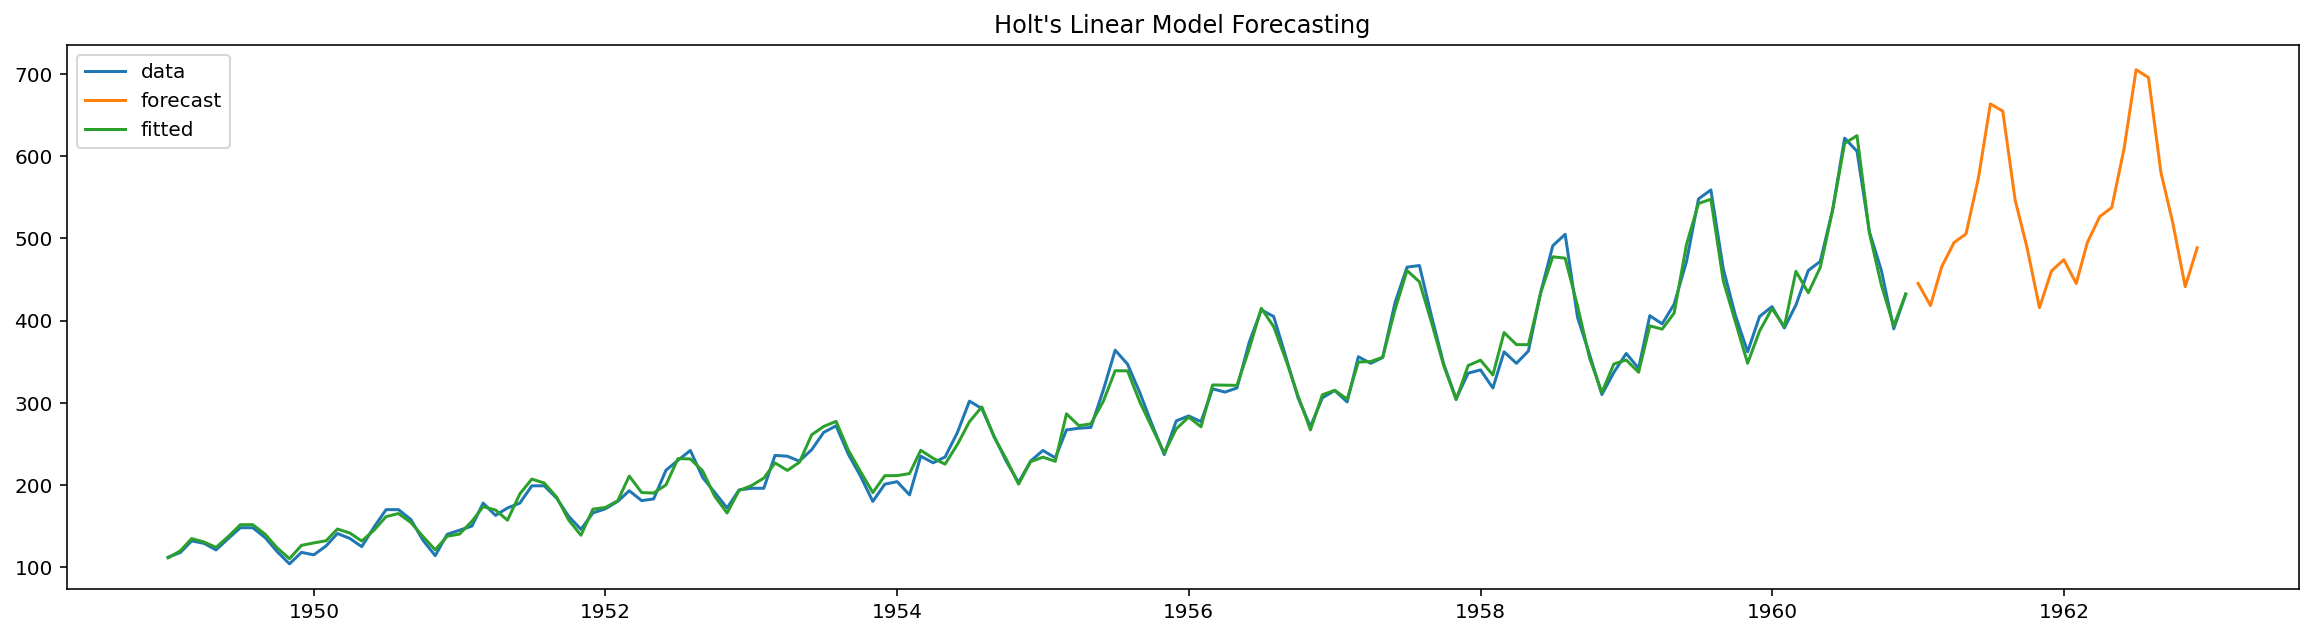

In [20]:
fig, ax = plt.subplots(figsize = (20,5))
plt.plot(airline, label = 'data')
plt.plot(forecast, label = 'forecast')
plt.plot(fitted, label = 'fitted')
plt.title("Holt's Linear Model Forecasting")
plt.legend(loc = 'upper left')
plt.show()

### 6. AutoRegressive

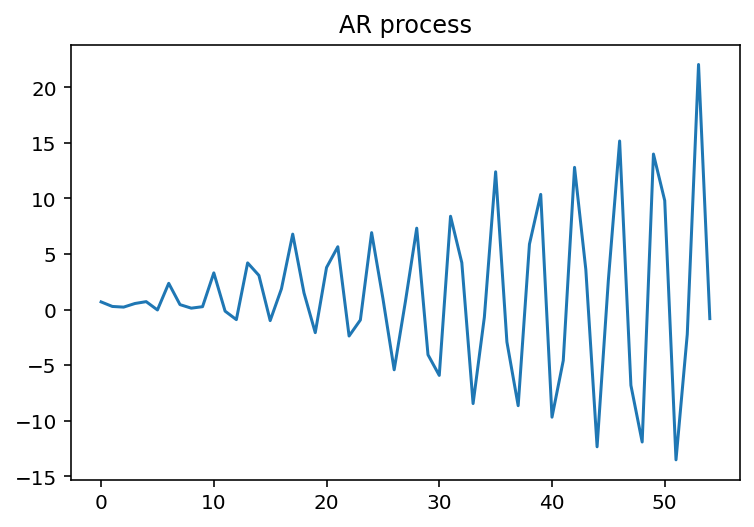

In [21]:
from scipy import stats
np.random.seed(123)
order = 5
values = np.random.random(size = order)
coefs = -1 + 2 * np.random.random(size = order)
b = np.random.random()
err_fn = stats.norm(loc = 0, scale = 1)
for _ in range(50):
    next_val = (coefs * values[-order:]).sum() + b + err_fn.rvs()
    values = np.append(values, next_val)
plt.plot(values)
plt.title("AR process")
plt.show()

### 7. Moving Average

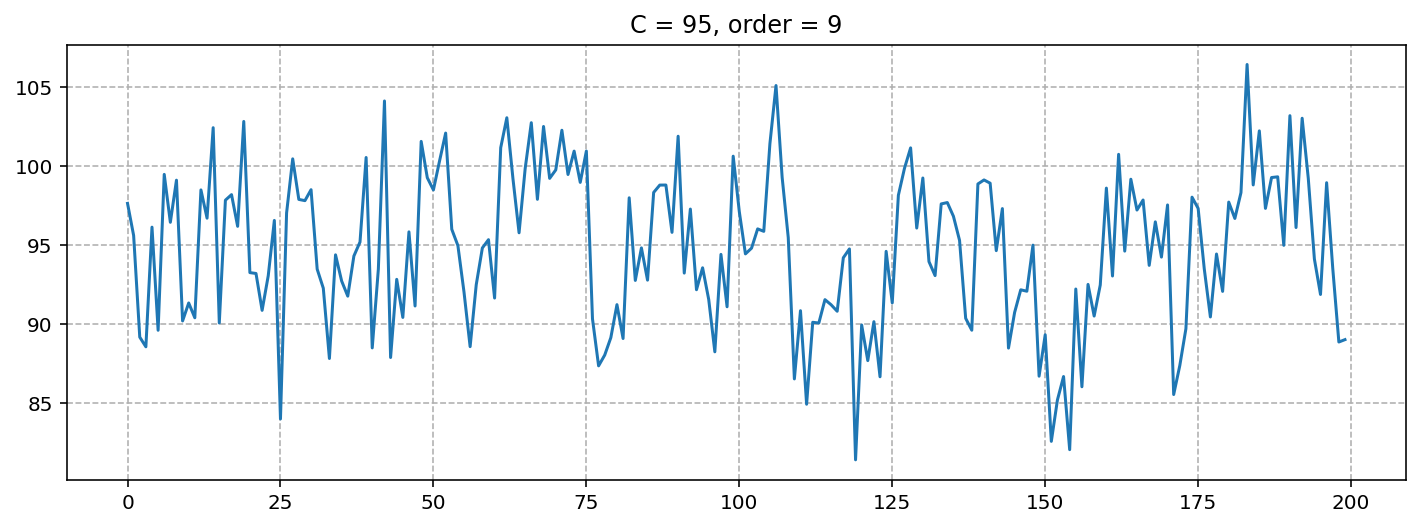

In [22]:
order = np.random.randint(1,10)
c = np.random.randint(1,100)

err_fn = stats.norm(0,3)
errs = err_fn.rvs(order-1)
ys = np.array([])
coefs = np.random.random(order-1)

for _ in range(200):
    err = err_fn.rvs()
    errs = np.append(errs, err)
    y = (coefs * errs[-(order-1):] ).sum() + err+ c
    ys = np.append(ys, y)

fig, ax = plt.subplots(figsize = (12,4))
plt.plot(ys)
plt.title(f"C = {c}, order = {order}")
plt.grid(linestyle = '--')
plt.show()

### 8. ARIMA

In [39]:
air = airline.copy()
air_diff1 = air.diff().dropna()
air_log = np.log(air)

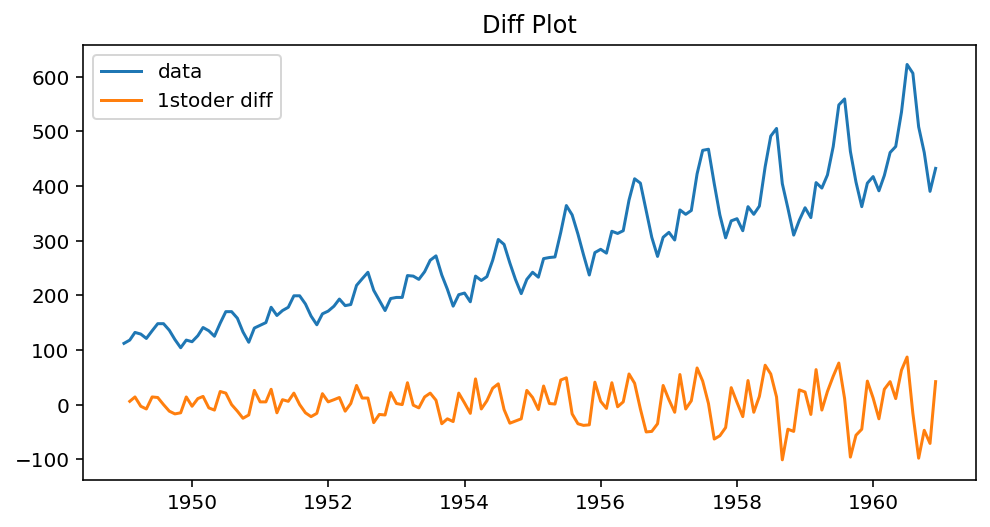

In [40]:
fig, ax = plt.subplots(figsize = (8,4))
plt.plot(air,label = 'data')
plt.plot(air_diff1, label = '1stoder diff')
plt.legend(loc = 'upper left')
plt.title("Diff Plot")
plt.show()

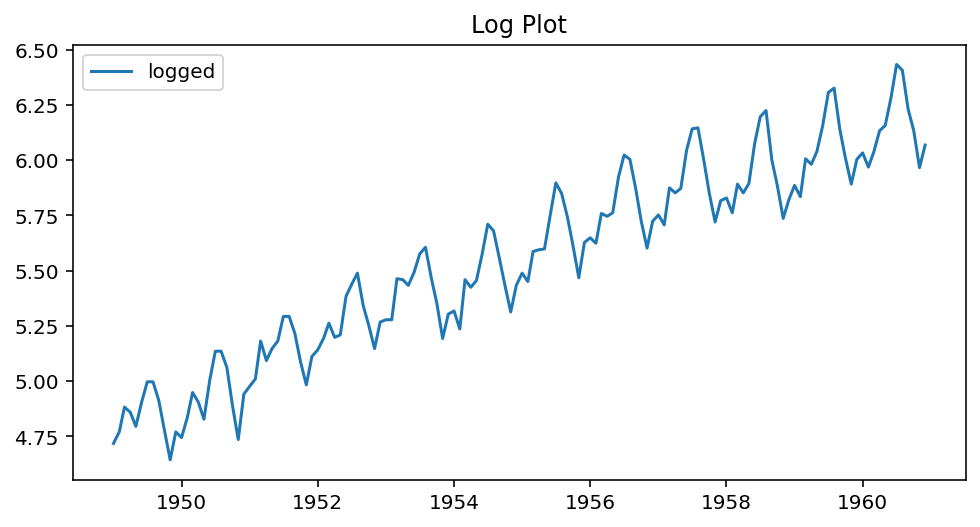

In [42]:
fig, ax = plt.subplots(figsize = (8,4))
plt.plot(air_log, label = 'logged')
plt.legend(loc = 'upper left')
plt.title("Log Plot")
plt.show()

In [47]:
from statsmodels.tsa.arima.model import ARIMA

In [57]:
Ntest = 12
train = air.iloc[:-Ntest]
test = air.iloc[-Ntest:]

**Fit and extract infomation**

In [84]:
arima = ARIMA(train['Passengers'], order = (1,0,0))
arima_result = arima.fit()
fitted = arima_result.fittedvalues
summary_df = arima_result.get_forecast(Ntest).summary_frame()
forecast = summary_df['mean']
lower = summary_df['mean_ci_lower']
upper = summary_df['mean_ci_upper']

**Plot forecast**

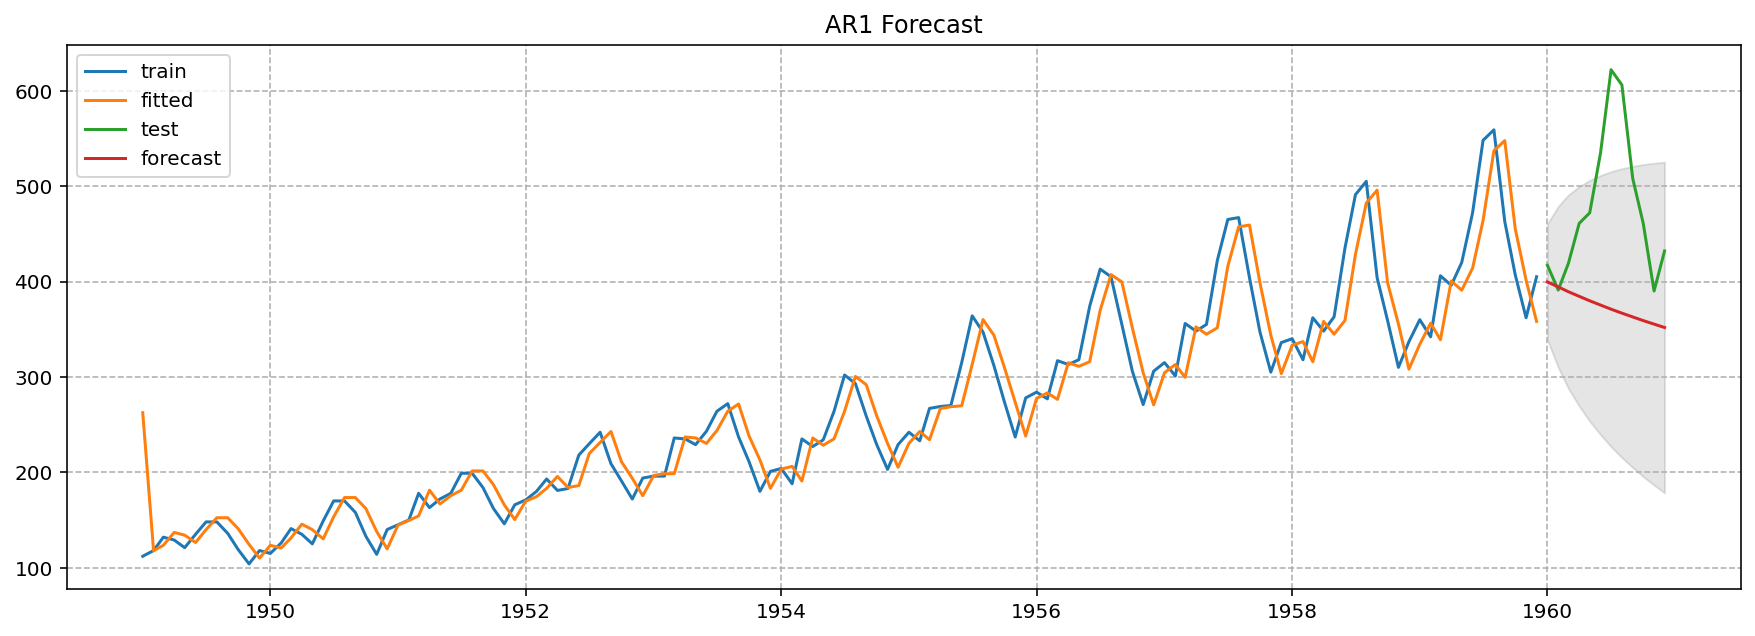

In [86]:
fig, ax = plt.subplots(figsize = (15,5))
plt.plot(train, label = 'train')
plt.plot(fitted, label = 'fitted')
plt.plot(test, label = 'test')
plt.plot(forecast, label = 'forecast')
plt.grid(linestyle='--')
plt.legend(loc = 'upper left')
plt.title("AR1 Forecast")
ax.fill_between(summary_df.index, lower, upper, color='k', alpha=0.1)
plt.show()

In [93]:
def experiment(arima):
    arima_result = arima.fit()
    fitted = arima_result.fittedvalues
    summary_df = arima_result.get_forecast(Ntest).summary_frame()
    forecast = summary_df['mean']
    lower = summary_df['mean_ci_lower']
    upper = summary_df['mean_ci_upper']
    
    fig, ax = plt.subplots(figsize = (15,5))
    plt.plot(train, label = 'train')
    plt.plot(fitted, label = 'fitted')
    plt.plot(test, label = 'test')
    plt.plot(forecast, label = 'forecast')
    plt.grid(linestyle='--')
    plt.legend(loc = 'upper left')
    plt.title("AR Forecast")
    ax.fill_between(summary_df.index, lower, upper, color='k', alpha=0.1)
    plt.show()
    

**Test a AR(12) model**

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


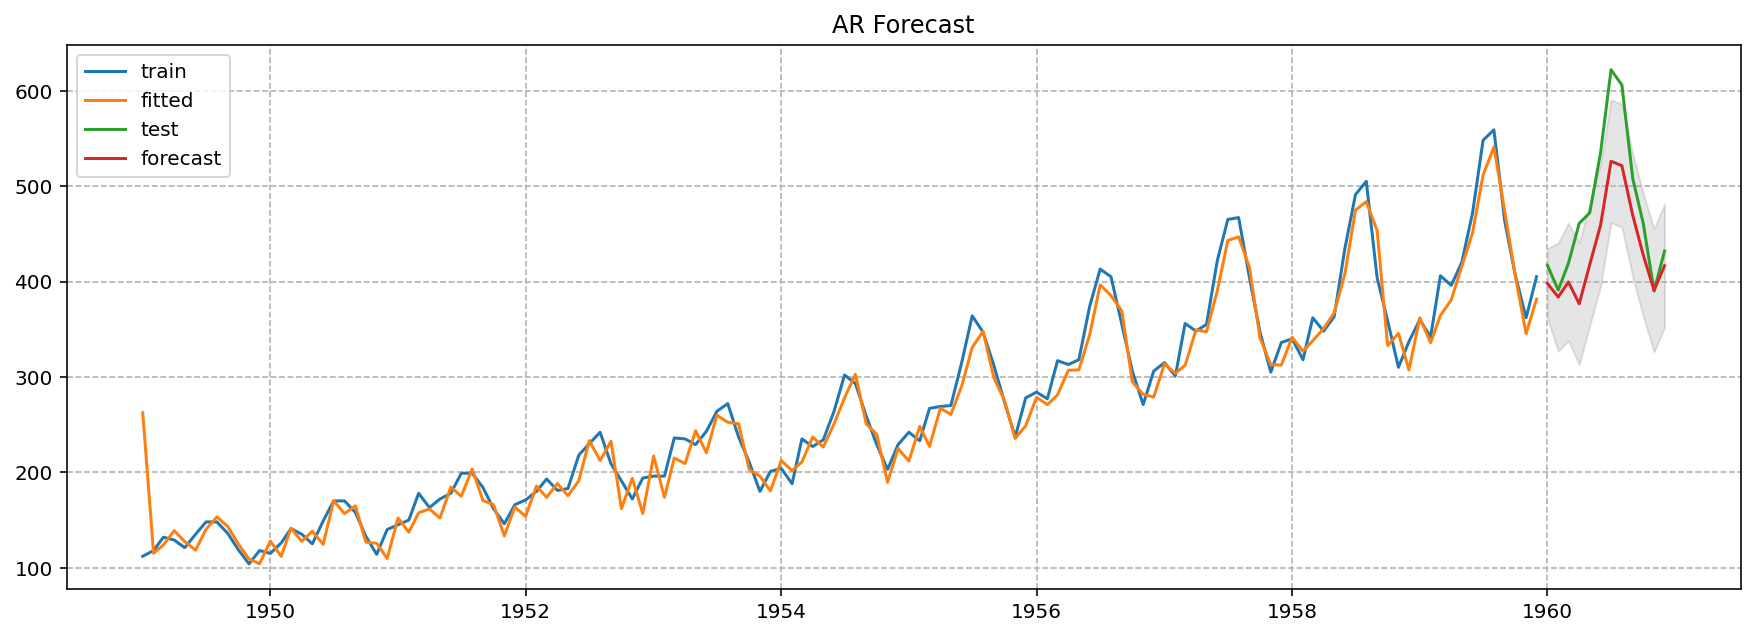

In [94]:
experiment(ARIMA(train['Passengers'], order = (12,0,0)))

**Test a MA(1) model**

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


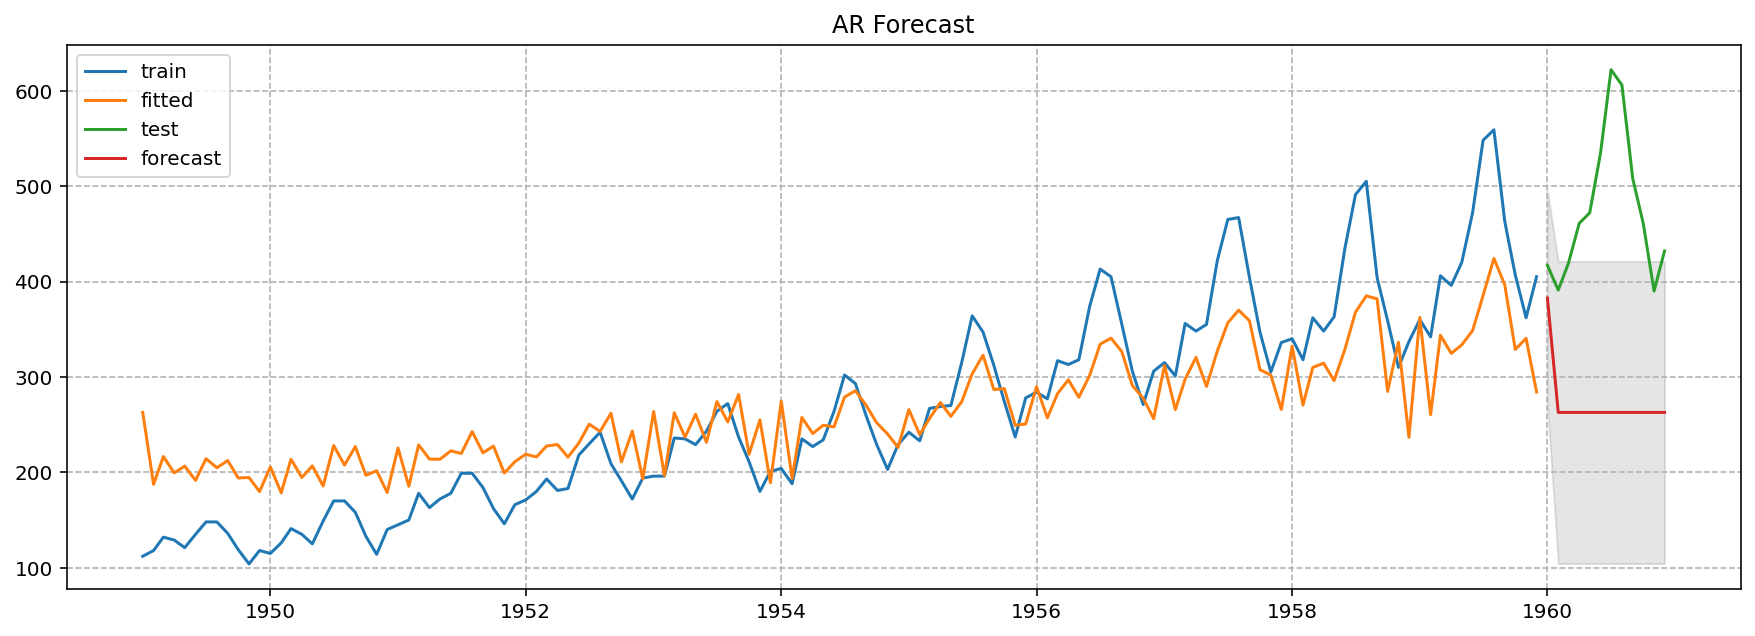

In [95]:
experiment(ARIMA(train['Passengers'], order = (0,0,1)))

**Test First Order Difference**

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


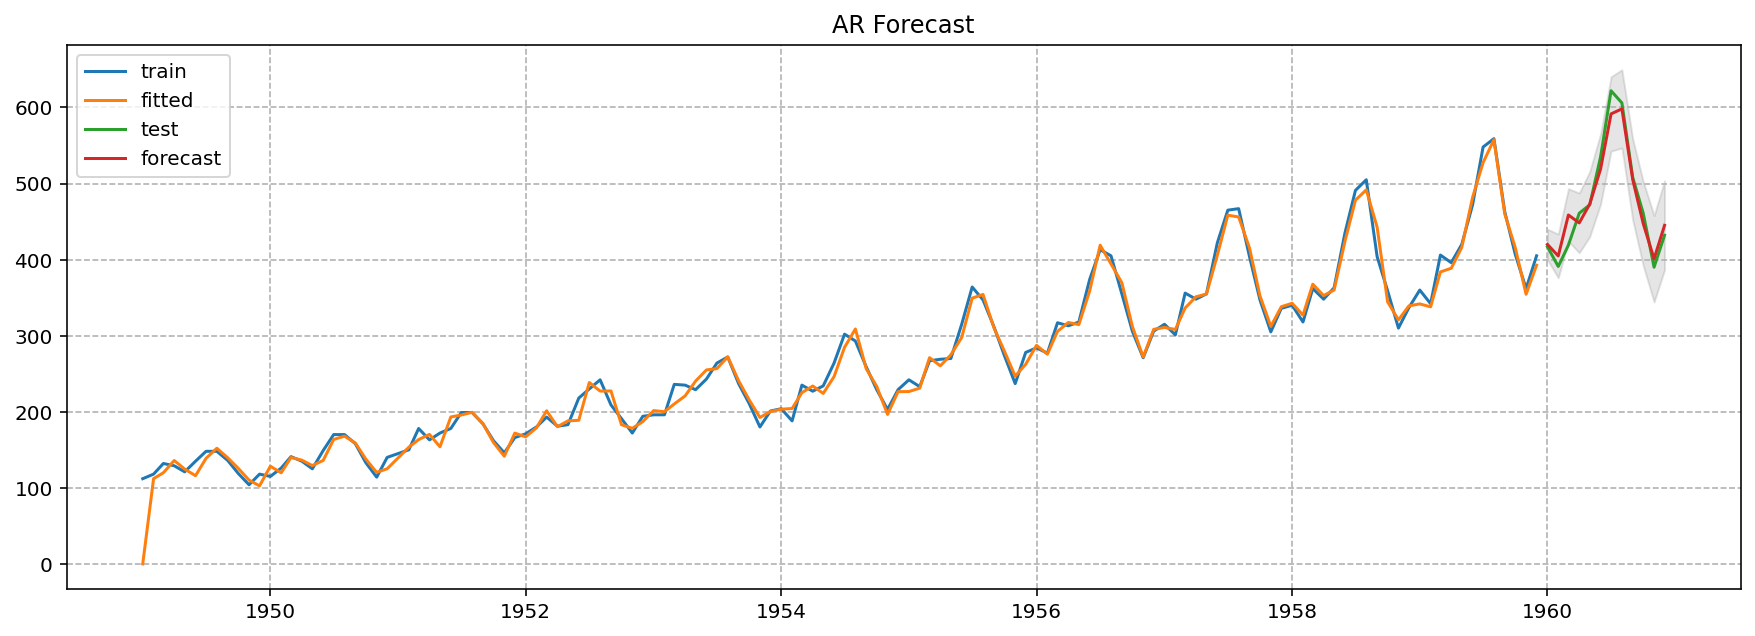

In [96]:
experiment(ARIMA(train['Passengers'], order = (12,1,0)))

**Test more complicated Model**

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


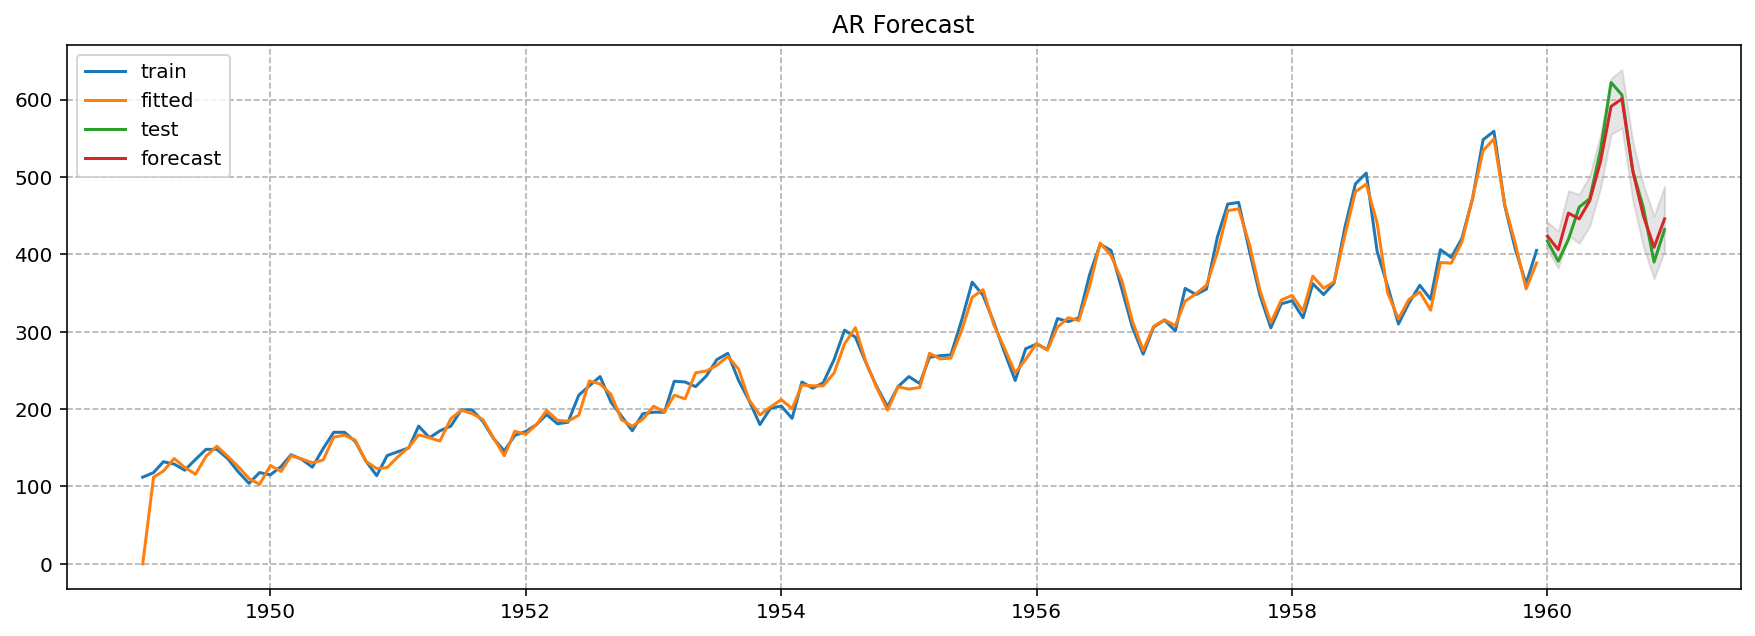

In [97]:
experiment(ARIMA(train['Passengers'], order = (12,1,12)))

### 9. Stationary and Adfuller test

In [111]:
from statsmodels.tsa.stattools import adfuller
alpha = 0.05
adf, pvalue, used_lag, nobs, critical_values, icbest = adfuller(airline['Passengers'])
"Stationary" if pvalue < alpha else "Not Stationary"

'Not Stationary'

In [113]:
def test_stationary(series, alpha = 0.05):
    adf, pvalue, used_lag, nobs, critical_values, icbest = adfuller(series)
    result = "Stationary" if pvalue < alpha else "Not Stationary"
    print("Test Statistics: {}".format(adf))
    print("P value: {}".format(pvalue))
    print(result)

In [116]:
test_stationary(airline['Passengers'])

Test Statistics: 0.8153688792060472
P value: 0.991880243437641
Not Stationary


In [117]:
test_stationary(np.log(airline['Passengers']))

Test Statistics: -1.7170170891069605
P value: 0.42236677477039125
Not Stationary


In [118]:
test_stationary(airline['Passengers'].diff().dropna())

Test Statistics: -2.8292668241700056
P value: 0.054213290283824704
Not Stationary


In [119]:
test_stationary(np.log(airline['Passengers']).diff().dropna())

Test Statistics: -2.717130598388128
P value: 0.07112054815085957
Not Stationary


**Test a Stock Return**

In [126]:
test_stationary(np.log(goog).diff().dropna() + 1)

Test Statistics: -29.185893355176606
P value: 0.0
Stationary


### 10 ACF and PACF

In [127]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

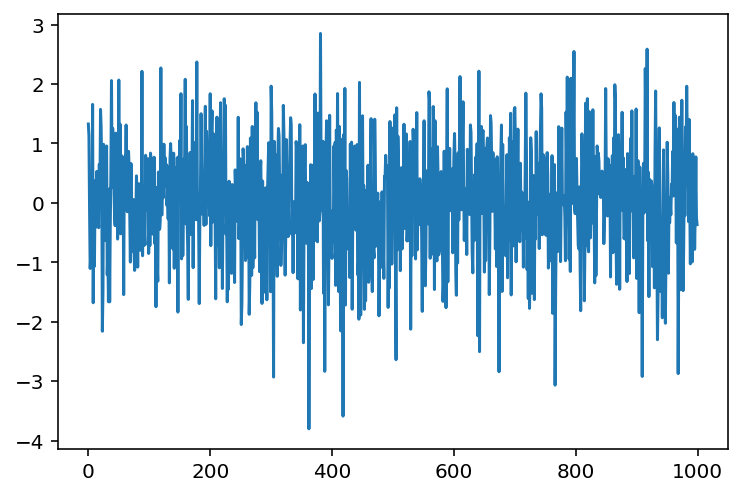

In [129]:
x0 = np.random.randn(1000)
plt.plot(x0)
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


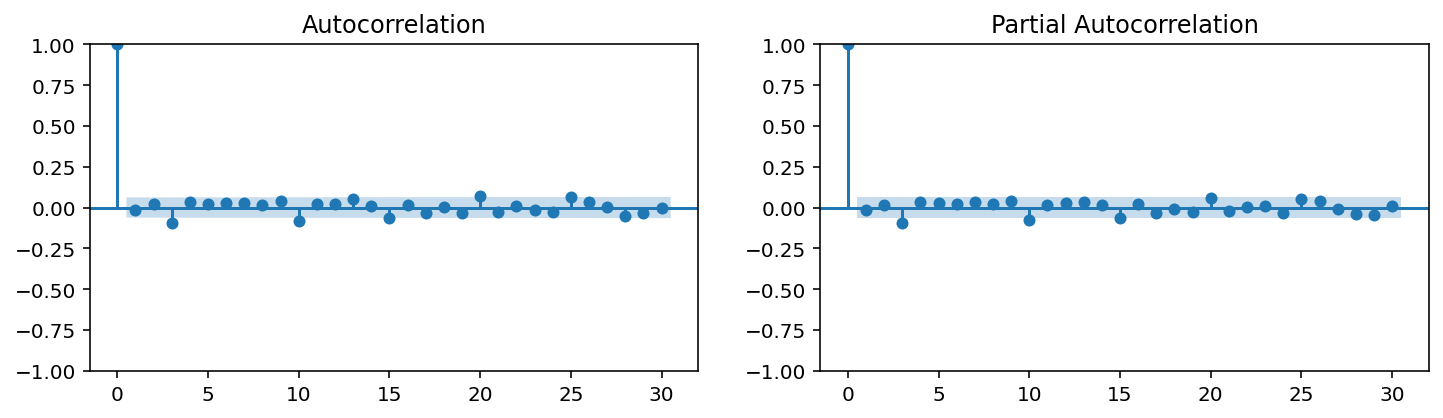

In [136]:
fig, ax = plt.subplots(figsize = (12,3))
ax1 = plt.subplot(1,2,1)
_ = plot_acf(x0, ax = ax1)
ax2 = plt.subplot(1,2,2)
_ = plot_pacf(x0, ax = ax2)
plt.show()

In [137]:
def plot_acf_and_pacf(series):
    fig, ax = plt.subplots(figsize = (12,3))
    ax1 = plt.subplot(1,2,1)
    _ = plot_acf(series, ax = ax1)
    ax2 = plt.subplot(1,2,2)
    _ = plot_pacf(series, ax = ax2)
    plt.show()

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


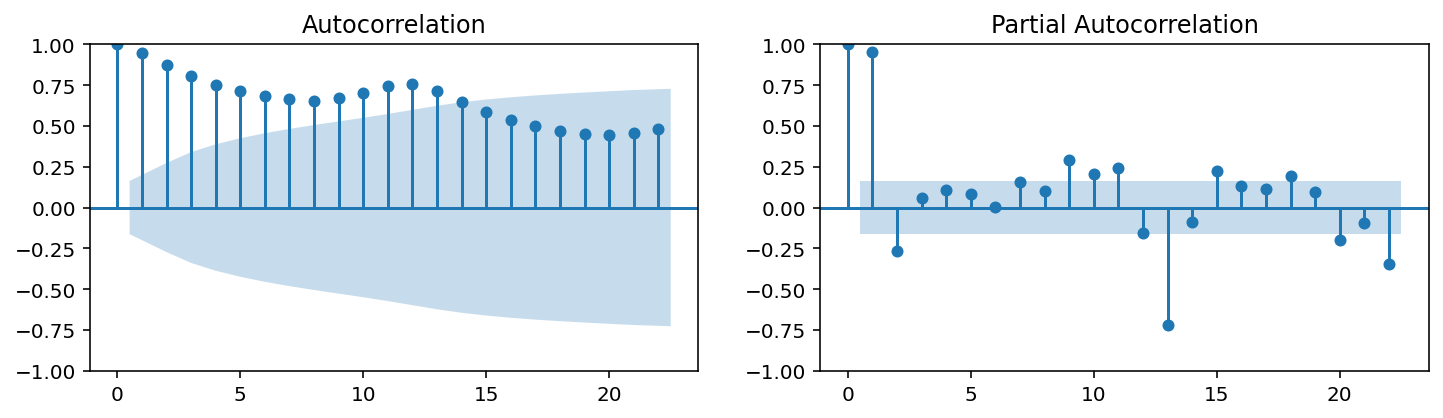

In [138]:
plot_acf_and_pacf(airline['Passengers'])